Import necessary package

In [ ]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Data pre processing

In [ ]:
y_train[0]

5

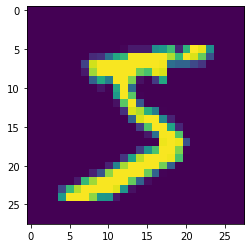

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 114s 61ms/step - loss: 0.2477 - accuracy: 0.9493 - val_loss: 0.1070 - val_accuracy: 0.9673
Epoch 2/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0733 - accuracy: 0.9779 - val_loss: 0.0911 - val_accuracy: 0.9720
Epoch 3/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0514 - accuracy: 0.9836 - val_loss: 0.0770 - val_accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 0.1059 - val_accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0307 - accuracy: 0.9902 - val_loss: 0.1467 - val_accuracy: 0.9659


Test the model

In [ ]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.1467457413673401, 0.9659000039100647]


In [ ]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 61ms/step
[[1.13097381e-14 6.10964441e-16 2.75749112e-08 2.60063666e-06
  8.16322316e-19 2.61214542e-15 3.90185538e-21 9.99997377e-01
  8.02162330e-12 3.58839874e-10]
 [4.35528409e-06 1.26228933e-05 9.92712259e-01 3.02815089e-08
  1.41155482e-07 2.15644410e-13 7.27035990e-03 1.57948288e-09
  2.51156166e-07 1.81155698e-12]
 [4.82114526e-09 9.94708657e-01 1.62380147e-07 1.23419048e-12
  3.25671390e-05 6.87361899e-05 3.18530802e-08 2.54354359e-06
  5.18681249e-03 5.13876330e-07]
 [9.99928713e-01 1.38321155e-09 1.07010635e-07 7.10498966e-08
  1.45274581e-09 1.05684394e-05 6.02090258e-05 4.89404606e-08
  1.23957946e-08 2.76719248e-07]]


In [ ]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
